In [ ]:
#Decision tree for titanic data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Shape:", titanic.shape)
print("Size:", titanic.size)

Shape: (891, 12)
Size: 10692


In [ ]:
print("Null Error Rate:", format(titanic['Survived'].mean() * 100, '.2f'), '%')

Null Error Rate: 38.38 %


In [ ]:
titanic.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
class_sex_grouping = titanic.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                     
1      female   469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       male     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       male     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       male     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

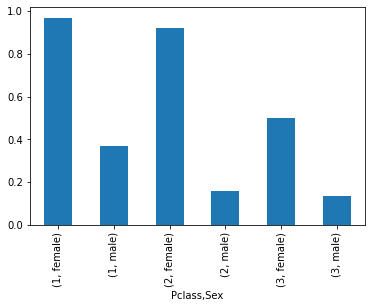

In [ ]:
class_sex_grouping['Survived'].plot.bar()
plt.show()

Data preprocessing


In [ ]:
titanic = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [ ]:
titanic.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Survived    False
dtype: bool

In [ ]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Substitute NANs in age column

titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [ ]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Mapping Sex
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

To build a model

In [ ]:
# The columns that we will be making predictions with
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#The column that we will be making predictions on
y = titanic['Survived']

In [ ]:
### Split data randomly into 70% training and 30% test ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predicted = model2.predict(X_test)
print("Accuracy for test data set:\n")
print (format(metrics.accuracy_score(y_test, predicted) * 100,'.2f'), '%.')

Accuracy for test data set:

80.97 %.


In [ ]:
param_test1 = {
 'max_depth': range(2, 10),   
 'min_samples_split': [3, 5, 7, 10],
 'min_samples_leaf': [3, 5, 7, 10]
}

grid_result = GridSearchCV(DecisionTreeClassifier(), param_grid=param_test1, cv=10, n_jobs=-1, verbose=1)
grid_result.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best: 0.820276 using {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [ ]:
print("Accuracy for test data set:\n")
predicted = grid_result.predict(X_test)
print (format(metrics.accuracy_score(y_test, predicted) * 100,'.2f'), '%.')

Accuracy for test data set:

82.46 %.


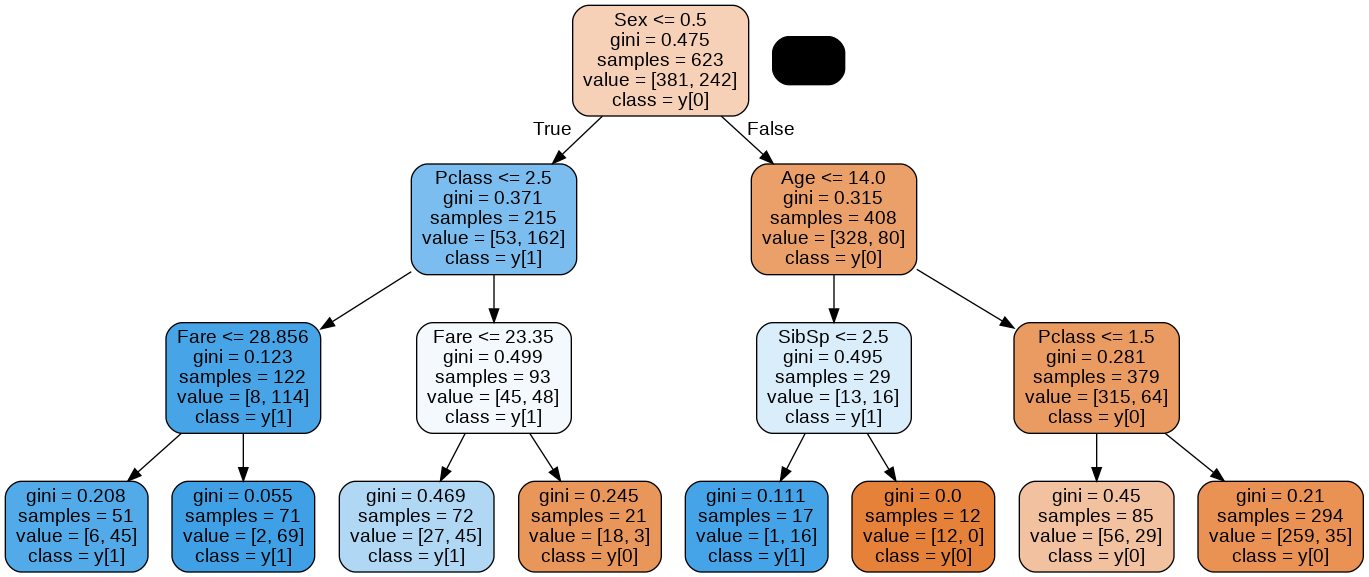

In [ ]:
dot_data = tree.export_graphviz(grid_result.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
                                class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

For prediction the chance of survival of a 3 year old boy travelling with parents in 2nd class

```
# This is formatted as code
```



In [ ]:
grid_result.predict_proba(np.array([[2, 1, 3, 0, 2, 0.0]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.05882353, 0.94117647]])